In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
import matplotlib as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/abstract-data-set-for-credit-card-fraud-detection/creditcardcsvpresent.csv


In [2]:
data=pd.read_csv('../input/abstract-data-set-for-credit-card-fraud-detection/creditcardcsvpresent.csv')
data.head()

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,NaN,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,3160040998,NaN,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,3160041896,NaN,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,3160141996,NaN,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,3160241992,NaN,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y


In [3]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        #else:
            #df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB --> {:.2f} MB (Decreased by {:.1f}%)'.format(
        start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [4]:
datanew = reduce_mem_usage(data)

Memory usage of dataframe is 0.28 MB --> 0.18 MB (Decreased by 37.5%)


In [5]:
datanew.drop(['Transaction date'], axis = 1, inplace = True)

In [6]:
datanew.describe()

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Total Number of declines/day,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
count,3.075000e+03,3075.000000,3075.000000,3075.000000,3075.000000,3075.0,3075.000000
mean,5.026634e+09,inf,9876.400391,0.957398,55.737561,inf,0.391870
std,9.870778e+08,inf,10135.341797,2.192391,206.634779,inf,1.548479
min,3.160041e+09,4.011719,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.170814e+09,269.750000,2408.781128,0.000000,0.000000,0.0,0.000000
50%,5.025578e+09,502.500000,6698.892090,0.000000,0.000000,0.0,0.000000
75%,5.889625e+09,765.250000,14422.568848,0.000000,0.000000,0.0,0.000000
max,6.665906e+09,2000.000000,108000.000000,20.000000,998.000000,998.0,9.000000


In [7]:
df= datanew.corr()
df.head()

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Total Number of declines/day,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
Merchant_id,1.000000,0.018225,0.046065,-0.016165,0.088802,0.091623,0.118599
Average Amount/transaction/day,0.018225,1.000000,0.587110,-0.009684,0.060424,0.060279,0.071849
Transaction_amount,0.046065,0.587110,1.000000,0.259309,0.252298,0.259662,0.297623
Total Number of declines/day,-0.016165,-0.009684,0.259309,1.000000,0.094834,0.081138,0.085028
Daily_chargeback_avg_amt,0.088802,0.060424,0.252298,0.094834,1.000000,0.953664,0.884611


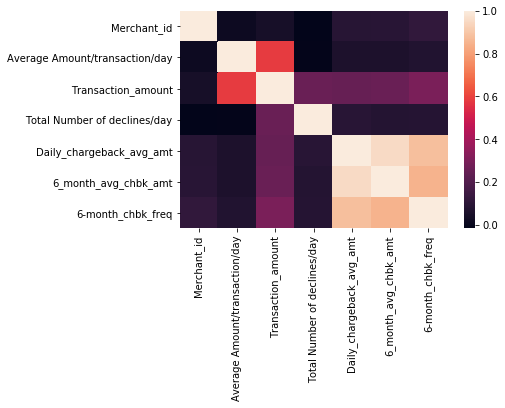

In [8]:
heat_map = sb.heatmap(df)

In [9]:
datanew.columns

Index(['Merchant_id', 'Average Amount/transaction/day', 'Transaction_amount',
       'Is declined', 'Total Number of declines/day', 'isForeignTransaction',
       'isHighRiskCountry', 'Daily_chargeback_avg_amt', '6_month_avg_chbk_amt',
       '6-month_chbk_freq', 'isFradulent'],
      dtype='object')

In [10]:
data.head()

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,3160040998,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,3160041896,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,3160141996,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,3160241992,500.0,26000.0,N,0,Y,Y,800,677.0,6,Y


In [11]:
dataf=datanew.dropna()

In [12]:
datanew.isnull()

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
3070,False,False,False,False,False,False,False,False,False,False,False
3071,False,False,False,False,False,False,False,False,False,False,False
3072,False,False,False,False,False,False,False,False,False,False,False
3073,False,False,False,False,False,False,False,False,False,False,False


In [13]:

dataf=pd.get_dummies(datanew)
dataf

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Total Number of declines/day,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,Is declined_N,Is declined_Y,isForeignTransaction_N,isForeignTransaction_Y,isHighRiskCountry_N,isHighRiskCountry_Y,isFradulent_N,isFradulent_Y
0,3160040998,100.0,3000.0,5,0,0.0,0,1,0,0,1,0,1,0,1
1,3160040998,100.0,4300.0,5,0,0.0,0,1,0,0,1,0,1,0,1
2,3160041896,185.5,4823.0,5,0,0.0,0,0,1,1,0,1,0,0,1
3,3160141996,185.5,5008.5,8,0,0.0,0,0,1,1,0,1,0,0,1
4,3160241992,500.0,26000.0,0,800,677.0,6,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3070,6661273532,500.0,11000.0,0,754,585.0,7,0,1,1,0,1,0,1,0
3071,6661273532,800.0,0.0,0,754,585.0,7,0,1,1,0,1,0,1,0
3072,6661273533,800.0,20800.0,0,754,585.0,7,0,1,1,0,1,0,1,0
3073,6661273532,1500.0,12000.0,0,754,585.0,7,0,1,0,1,0,1,1,0


In [14]:
dataf.columns


Index(['Merchant_id', 'Average Amount/transaction/day', 'Transaction_amount',
       'Total Number of declines/day', 'Daily_chargeback_avg_amt',
       '6_month_avg_chbk_amt', '6-month_chbk_freq', 'Is declined_N',
       'Is declined_Y', 'isForeignTransaction_N', 'isForeignTransaction_Y',
       'isHighRiskCountry_N', 'isHighRiskCountry_Y', 'isFradulent_N',
       'isFradulent_Y'],
      dtype='object')

In [15]:
X= dataf.iloc[:,:14]
Y=dataf[['isFradulent_Y']]

In [16]:
X.shape

(3075, 14)

In [17]:
Y.shape

(3075, 1)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y,random_state = 101, test_size=0.3)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(max_features=1000, binary=True)

X_train_vect = vect.fit_transform(X_train)

In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8592007434944238

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predicted))
print('\n')
print(classification_report(y_test, predicted))
model.score(X_train,y_train)

NameError: name 'predicted' is not defined

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
model1= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
model1.fit(X_train, y_train)
predicted= model1.predict(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predicted))
print('\n')
print(classification_report(y_test, predicted))
model1.score(X_train,y_train)

[[778   0]
 [  0 145]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       778
           1       1.00      1.00      1.00       145

    accuracy                           1.00       923
   macro avg       1.00      1.00      1.00       923
weighted avg       1.00      1.00      1.00       923



1.0

In [24]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

nb.fit(X_train, y_train)

nb.score(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7857806691449815

In [25]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predicted))
print('\n')
print(classification_report(y_test, predicted))
nb.score(X_train,y_train)

[[778   0]
 [  0 145]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       778
           1       1.00      1.00      1.00       145

    accuracy                           1.00       923
   macro avg       1.00      1.00      1.00       923
weighted avg       1.00      1.00      1.00       923



0.7857806691449815

In [26]:
TestValue=dataf.iloc[0,:13]
TestValue

Merchant_id                       3.160041e+09
Average Amount/transaction/day    1.000000e+02
Transaction_amount                3.000000e+03
Total Number of declines/day      5.000000e+00
Daily_chargeback_avg_amt          0.000000e+00
6_month_avg_chbk_amt              0.000000e+00
6-month_chbk_freq                 0.000000e+00
Is declined_N                     1.000000e+00
Is declined_Y                     0.000000e+00
isForeignTransaction_N            0.000000e+00
isForeignTransaction_Y            1.000000e+00
isHighRiskCountry_N               0.000000e+00
isHighRiskCountry_Y               1.000000e+00
Name: 0, dtype: float64